In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [35]:
peng_df = pd.read_csv("penguins_binary_classification.csv")
peng_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007
...,...,...,...,...,...,...,...
269,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,2009
270,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,2009
271,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2009
272,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,2009


In [36]:
peng_df.info()
print('\n')
peng_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   year               274 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.1+ KB




,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,274.000000,274.000000,274.000000,274.000000,274.000000
mean,42.702920,16.836131,202.178832,4318.065693,2008.043796
std,5.195566,2.013410,15.047938,835.933105,0.806281
min,32.100000,13.100000,172.000000,2850.000000,2007.000000
25%,38.350000,15.000000,190.000000,3600.000000,2007.000000
50%,42.000000,17.000000,198.000000,4262.500000,2008.000000
75%,46.675000,18.500000,215.000000,4950.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


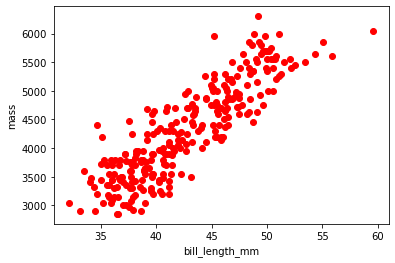

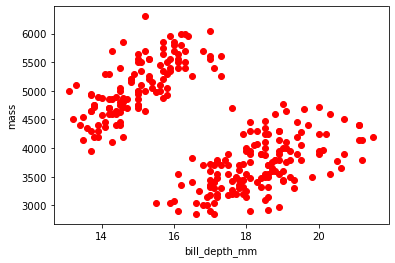

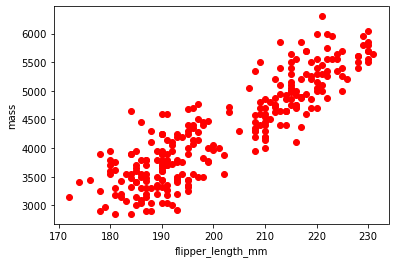

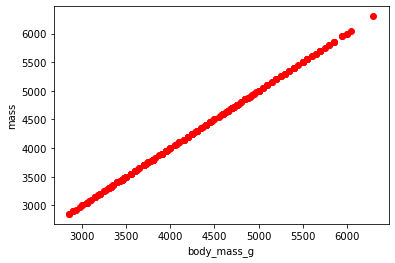

In [37]:
for i in peng_df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]:
    plt.scatter(peng_df[i],peng_df['body_mass_g'],color='red')
    plt.xlabel(i)
    plt.ylabel("mass")
    plt.show()

In [38]:
peng_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007


In [39]:
peng_df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'year'],
      dtype='object')

<AxesSubplot:>

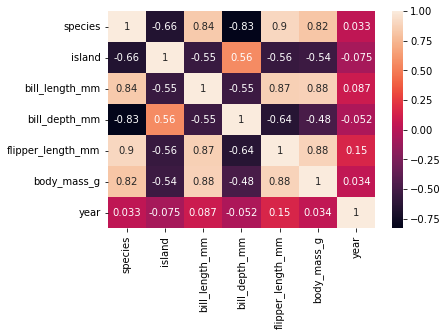

In [40]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
encoder = LabelEncoder()

peng_df['species'] = encoder.fit_transform(peng_df['species'])
peng_df['island'] = encoder.fit_transform(peng_df['island'])
sns.heatmap(peng_df.corr(), annot = True)

In [41]:
X=peng_df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
Y=peng_df['species']


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42) 

In [56]:
X_train.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
10,37.8,17.3,180.0,3700.0
256,46.8,16.1,215.0,5500.0
120,37.7,19.8,198.0,3500.0
33,36.4,17.0,195.0,3325.0
173,46.5,14.5,213.0,4400.0


In [57]:
ln = LogisticRegression()

In [58]:
ln.fit(X_train,Y_train)

LogisticRegression()

In [59]:
pred = ln.predict(X_test)

In [60]:
pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1])

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay

In [62]:
acc = accuracy_score(Y_test,pred)
acc

1.0



Model Confusion Matrix


Jaccard Similarity Score:	1.0


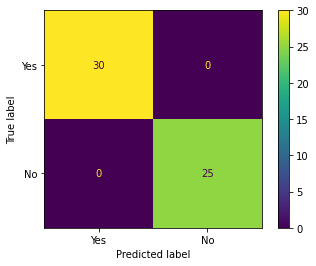

In [63]:
dsp=ConfusionMatrixDisplay(confusion_matrix(Y_test,pred),display_labels=["Yes","No"])
print('\n')
dsp.plot()
print("Model Confusion Matrix")
from sklearn.metrics import jaccard_score
print('\n')
print("Jaccard Similarity Score:", end='\t')
print(jaccard_score(Y_test,pred))